In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def imprimir_proporciones_none(dataframe):
    aux=0
    for i in range(0, len(datos.columns)):
        print("Columna: " + datos.columns[i])
        aux = datos[datos.columns[i]].value_counts()
        if "None" in aux.index:
            print("Hay " + aux["None"].astype(str) + " None")
            print("El porcentaje de None es: " + (aux["None"]*100/aux.sum()).astype(str) + "%")
        else:
            print("No hay None")
        print("")

def filtrar_columnas_nulas(dataframe):
    aux = 0
    ret_list = []
    for i in range(0, len(dataframe.columns)):
        aux = datos[dataframe.columns[i]].value_counts()
        if "None" in aux.index:
            if aux["None"]==len(dataframe):
                print(dataframe.columns[i])
                continue
        ret_list.append(dataframe.columns[i])
    return ret_list

def columnas_invariantes(dataframe):
    for i in range(0,len(dataframe.columns)):
        if len(dataframe[dataframe.columns[i]].value_counts())==1:
            print("La columna " + dataframe.columns[i] + " tiene un solo dato")
            print("")

def filtrar_columnas_invariantes(dataframe):
    ret_list = []
    for i in range(0,len(dataframe.columns)):
        if (len(dataframe[dataframe.columns[i]].value_counts())>1):
            ret_list.append(dataframe.columns[i])
    return ret_list

In [3]:
datos_csv = pd.read_csv("Entrenamieto_ECI_2020.csv")
datos = datos_csv.replace({"NaT":"None", "nan":"None", "NaN":"None"})


#imprimir_proporciones_none(datos)

datos = datos[filtrar_columnas_nulas(datos)]
datos["Price"] = pd.to_numeric(datos["Price"], errors="coerce")
datos["Quote_Expiry_Date"] = pd.to_numeric(datos["Price"], errors="coerce")
datos["Last_Modified_Date"] = pd.to_numeric(datos["Price"], errors="coerce")
#datos["Actual_Delivery_Date"] = pd.to_numeric(datos["Actual_Delivery_Date"], errors="coerce")
columnas_invariantes(datos)
datos = datos[filtrar_columnas_invariantes(datos)]

#Para esta linea ya se tienen filtradas las columnas que solo tienen None o que tiene un dato que se repite
#en todas las lineas
#imprimir_proporciones_none(datos)

Last_Activity
Actual_Delivery_Date
La columna Submitted_for_Approval tiene un solo dato

La columna ASP_(converted)_Currency tiene un solo dato

La columna Prod_Category_A tiene un solo dato



In [4]:
datos["TRF"].value_counts().head(50)
#datos["TRF"].value_counts()

0      11971
1       2192
2        627
3        354
5        297
4        208
10       190
6        131
7        111
20        83
11        58
8         54
12        48
30        43
13        40
25        38
15        35
9         31
14        30
17        29
19        25
50        22
28        19
18        19
60        17
40        17
23        12
35        12
26        11
27        10
120        9
45         9
21         8
22         8
33         7
24         7
36         7
29         6
75         6
67         6
16         6
100        6
65         5
38         5
63         5
43         5
150        5
125        4
70         4
37         4
Name: TRF, dtype: int64

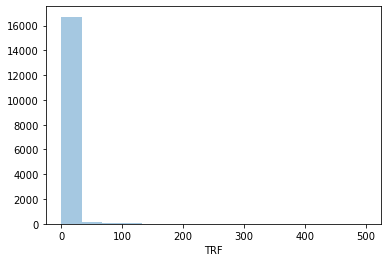

In [5]:
#Se toman 15 bins porque asi se tienen bins de largo 33 numeros, que 
sns.distplot(a=datos["TRF"], label="TRF", bins=15, kde=False)#bins de largo 33

#Se ve que casi todas las oportunidades son para toneladas de refrigeracion de 0 a 33
#Se tienen mas ofertas de compra que 

In [6]:
#Para evitar el problema de la ecuación de Demoivre, se analizan solo los TRF con más de 100 instancias
v_counts = datos["TRF"].value_counts()
TRF_a_analizar = v_counts[v_counts>=100]
print(TRF_a_analizar)
TRF_a_analizar = list(TRF_a_analizar.index)#Lista de los valores de TRF que se van a analizar

0     11971
1      2192
2       627
3       354
5       297
4       208
10      190
6       131
7       111
Name: TRF, dtype: int64


In [7]:
df_TRF_mas_pedidos = datos[datos["TRF"].isin(TRF_a_analizar)]
df_TRF_mas_pedidos

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,6/16/2015,None,...,6/30/2016,2016 - 5,Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,...,1/20/2016,2016 - 1,Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,...,1/25/2016,2016 - 1,Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won
6,16799,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,5/1/2017,2017 - 2,Q1,2017,7,USD,2659494.60,USD,2659494.6,Closed Lost
7,27455,Americas,NW America,1,1,1,1,Bureaucratic_Code_4,4/21/2015,Source_7,...,1/25/2016,2016 - 1,Q1,2016,0,USD,50688.00,USD,50688.0,Closed Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,18324,EMEA,Norway,1,1,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,...,4/21/2016,2016 - 4,Q2,2016,1,EUR,401700.00,EUR,401700.0,Closed Won
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,1/15/2016,Source_7,...,3/25/2016,2016 - 3,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,1/15/2016,Source_7,...,4/8/2016,2016 - 4,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won
16944,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,1/15/2016,Source_7,...,3/31/2016,2016 - 3,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won


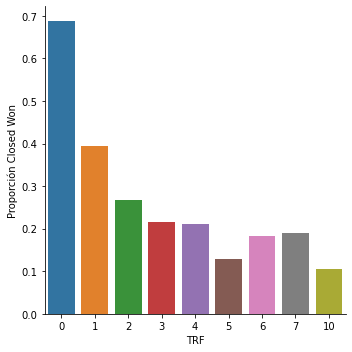

In [8]:
def proporcion_closed_won(x):
    return x.value_counts(normalize=True)["Closed Won"]

#REHACER ESTE ANALISIS, ESTA MAL PORQUE NO TOMO EN CUENTA QUE DENTRO DE UNA MISMA OPORTUNIDAD PUEDE HABER 
#DISTINTOS TRF, VER COMO ANALIZAR USANDO LOS PROMEDIOS


df_por_TRF = df_TRF_mas_pedidos[["TRF","Stage"]].groupby("TRF").agg({"Stage":proporcion_closed_won})
df_por_TRF.columns = ["Proporción Closed Won"]
df_por_TRF.reset_index(inplace=True)
sns.catplot(x="TRF",y="Proporción Closed Won",data=df_por_TRF,kind="bar")

#Grafico de proporcion de Closed Won para cada valor de TRF relevante (de 0 a 10 sin el 8 ni el 9)

Analizar: 
- Quote_type: ver si binding lleva a success y non binding lleva a fail. Tambien puedo ver si influye en el precio final del contrato (tal vez intentan cobrarles mas si es non binding y terminan ganando mas plata, esto se puede juntar con si es won y lost, porque puede ser que saquen mas plata en algún contrato pero pierdan más contratos, ganando así menos plata que si cobraran menos)
- Delivery_terms: ver si el resultado del contrato depende del valor de esta columna
- TRF: ver si hay un rango de valores en el que se cierra mas veces el contrato. También podría ver si influencia mucho en el precio (tendría que analizar distinto el caso de 0, porque deben ser productos muy distintos, asique seguro tienen esos precios distribuidos "uniformemente")

In [9]:
precios = datos[["ASP_Currency","ASP","ASP_(converted)"]]
precios.dropna(inplace=True)
precios = precios[precios["ASP"] != 0]
precios["equivalencia moneda USD"] = precios["ASP_(converted)"]/precios["ASP"]
conversion_promedio = precios.groupby("ASP_Currency").agg({"equivalencia moneda USD":"mean"})

#conversion_promedio guarda la conversion de 1 unidad de la moneda al dolar (cuantos dolares equivalen una
#unidad de la moneda)

<ipython-input-9-69a93ee49b92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios.dropna(inplace=True)


In [22]:
#Analizo la ganancia segun el precio y el tipo de quote
#precio_por_quote = datos[["Quote_Type",]]

def proporcion_won(x):
    return (x=="Closed Won").sum()/len(x)

oportunidades_no_duplicadas = datos.drop_duplicates(["Opportunity_ID"])\
        [["Quote_Type","Total_Taxable_Amount","Stage"]]#Guarda las filas sin repetir op_id
oportunidades_no_duplicadas = oportunidades_no_duplicadas[oportunidades_no_duplicadas["Total_Taxable_Amount"]!=0]
valores_por_quote = oportunidades_no_duplicadas.groupby("Quote_Type").\
        agg({"Total_Taxable_Amount":["count","mean","std"],"Stage":proporcion_won})
valores_por_quote.columns=valores_por_quote.columns.get_level_values(0)+"_"+\
        valores_por_quote.columns.get_level_values(1)
valores_por_quote.reset_index(inplace=True)
valores_por_quote
#oportunidades_no_duplicadas[oportunidades_no_duplicadas["Quote_Type"]=="Non Binding"]["Total_Taxable_Amount"].std()

,Quote_Type,Total_Taxable_Amount_count,Total_Taxable_Amount_mean,Total_Taxable_Amount_std,Stage_proporcion_won
0,Binding,121,5.932731e+06,1.875955e+07,0.512397
1,Non Binding,8986,3.407635e+06,2.563019e+07,0.536501


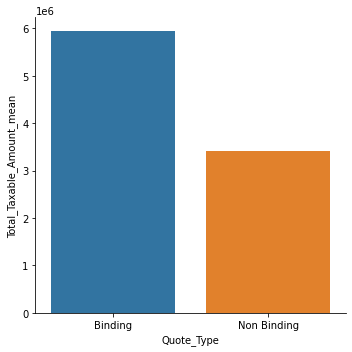

In [11]:
sns.catplot(x="Quote_Type",y="Total_Taxable_Amount_mean",data=valores_por_quote,kind="bar")